In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import gridspec

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/nyt/merged.csv', parse_dates=['timestamp'])

In [4]:
df['timestamp'] = df['timestamp'].dt.tz_convert('US/Central')

In [5]:
df = df[(df.timestamp >= '2020-11-03') & (df.timestamp < '2020-11-06')]
df = df.set_index(['state', 'timestamp'], drop=True)

In [6]:
df = df.sort_index(level=[0, 1])

In [7]:
df.index.levels[0]

Index(['alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado',
       'connecticut', 'delaware', 'district-of-columbia', 'florida', 'georgia',
       'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky',
       'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan',
       'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska', 'nevada',
       'new-hampshire', 'new-jersey', 'new-mexico', 'new-york',
       'north-carolina', 'north-dakota', 'ohio', 'oklahoma', 'oregon',
       'pennsylvania', 'rhode-island', 'south-carolina', 'south-dakota',
       'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington',
       'west-virginia', 'wisconsin', 'wyoming'],
      dtype='object', name='state')

In [8]:
df['trumpd_votes'] = (df['votes'] * df['trumpd']).astype(int)
df['bidenj_votes'] = (df['votes'] * df['bidenj']).astype(int)

In [9]:
sdf = df.loc['pennsylvania'].copy()

In [10]:
sdf.shape

(458, 6)

In [11]:
sdf.head(10)

,votes,eevp,trumpd,bidenj,trumpd_votes,bidenj_votes
timestamp,,,,,,
2020-11-03 18:19:27-06:00,77,0,0.429,0.571,33,43
2020-11-03 18:30:20-06:00,0,0,0.000,0.000,0,0
2020-11-03 18:42:45-06:00,11,0,0.364,0.636,4,6
2020-11-03 18:59:15-06:00,0,0,0.000,0.000,0,0
2020-11-03 19:03:44-06:00,64535,1,0.188,0.799,12132,51563
2020-11-03 19:14:19-06:00,86353,1,0.216,0.772,18652,66664
2020-11-03 19:14:26-06:00,120261,2,0.225,0.764,27058,91879
2020-11-03 19:15:31-06:00,195481,3,0.160,0.831,31276,162444
2020-11-03 19:15:55-06:00,211317,3,0.163,0.828,34444,174970


In [12]:
def get_dt(s):
    dt = [0]
    for i in range(1, s.shape[0]):
        dt.append(s[i] - s[i-1])
    return pd.Series(dt, index=s.index)

In [13]:
get_dt(sdf['trumpd_votes']).head(10)

timestamp
2020-11-03 18:19:27-06:00        0
2020-11-03 18:30:20-06:00      -33
2020-11-03 18:42:45-06:00        4
2020-11-03 18:59:15-06:00       -4
2020-11-03 19:03:44-06:00    12132
2020-11-03 19:14:19-06:00     6520
2020-11-03 19:14:26-06:00     8406
2020-11-03 19:15:31-06:00     4218
2020-11-03 19:15:55-06:00     3168
2020-11-03 19:17:19-06:00     2595
dtype: int64

In [14]:
sdf['trumpd_dt'] = get_dt(sdf['trumpd_votes'])
sdf['biden_dt'] = get_dt(sdf['bidenj_votes'])
sdf['batch_size'] = sdf['trumpd_dt'] + sdf['biden_dt']
sdf['trumpd_dt_pct'] = sdf['trumpd_dt'] / sdf['batch_size']
sdf['biden_dt_pct'] = sdf['biden_dt'] / sdf['batch_size']

In [15]:
sdf.head(20)

,votes,eevp,trumpd,bidenj,trumpd_votes,bidenj_votes,trumpd_dt,biden_dt,batch_size,trumpd_dt_pct,biden_dt_pct
timestamp,,,,,,,,,,,
2020-11-03 18:19:27-06:00,77,0,0.429,0.571,33,43,0,0,0,NaN,NaN
2020-11-03 18:30:20-06:00,0,0,0.000,0.000,0,0,-33,-43,-76,0.434211,0.565789
2020-11-03 18:42:45-06:00,11,0,0.364,0.636,4,6,4,6,10,0.400000,0.600000
2020-11-03 18:59:15-06:00,0,0,0.000,0.000,0,0,-4,-6,-10,0.400000,0.600000
2020-11-03 19:03:44-06:00,64535,1,0.188,0.799,12132,51563,12132,51563,63695,0.190470,0.809530
2020-11-03 19:14:19-06:00,86353,1,0.216,0.772,18652,66664,6520,15101,21621,0.301559,0.698441
2020-11-03 19:14:26-06:00,120261,2,0.225,0.764,27058,91879,8406,25215,33621,0.250022,0.749978
2020-11-03 19:15:31-06:00,195481,3,0.160,0.831,31276,162444,4218,70565,74783,0.056403,0.943597
2020-11-03 19:15:55-06:00,211317,3,0.163,0.828,34444,174970,3168,12526,15694,0.201861,0.798139


In [16]:
s = sdf['trumpd_dt_pct']

In [17]:
s.describe()

count    456.000000
mean      -0.211906
std       15.532340
min     -331.037037
25%        0.401252
50%        0.538949
75%        0.653725
max        3.279680
Name: trumpd_dt_pct, dtype: float64

In [18]:
sdf[s < -300]

,votes,eevp,trumpd,bidenj,trumpd_votes,bidenj_votes,trumpd_dt,biden_dt,batch_size,trumpd_dt_pct,biden_dt_pct
timestamp,,,,,,,,,,,
2020-11-03 22:08:51-06:00,2984522,42,0.56,0.426,1671332,1271406,-17876,17930,54,-331.037037,332.037037


Seems like an adjustment to steal trump votes here...

In [19]:
s.shape

(458,)

In [20]:
s = s[(s > 0) & (s < 1)]

In [21]:
s.shape

(415,)

Many weird entries... to be checked later

In [22]:
sdf['batch_size'].describe()

count    4.580000e+02
mean     1.429492e+04
std      3.506534e+05
min     -5.254560e+06
25%      7.550000e+02
50%      6.223000e+03
75%      1.838825e+04
max      5.258096e+06
Name: batch_size, dtype: float64

In [23]:
b = sdf['batch_size']

In [24]:
b.max(), b.min()

(5258096, -5254560)

In [25]:
b = b[(b < b.max()) & (b > b.min())]

In [26]:
b.describe()

count       456.000000
mean      14349.861842
std       45293.663683
min     -561769.000000
25%         773.000000
50%        6223.000000
75%       18374.750000
max      483157.000000
Name: batch_size, dtype: float64

<AxesSubplot:xlabel='timestamp'>

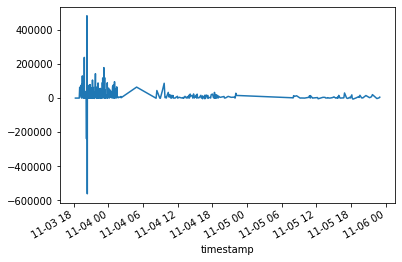

In [27]:
b.plot()

In [28]:
b = b[(b < b.max()) & (b > b.min())]
b.describe()

count       454.000000
mean      14586.231278
std       29028.467618
min     -238757.000000
25%         788.000000
50%        6223.000000
75%       18287.000000
max      238841.000000
Name: batch_size, dtype: float64

<AxesSubplot:xlabel='timestamp'>

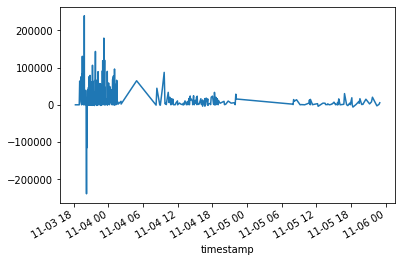

In [29]:
b.plot()

In [30]:
b = b[(b < b.max()) & (b > b.min())]
b.describe()

count       452.000000
mean      14650.586283
std       24342.641826
min     -115515.000000
25%         800.000000
50%        6223.000000
75%       18125.000000
max      178879.000000
Name: batch_size, dtype: float64

<AxesSubplot:xlabel='timestamp'>

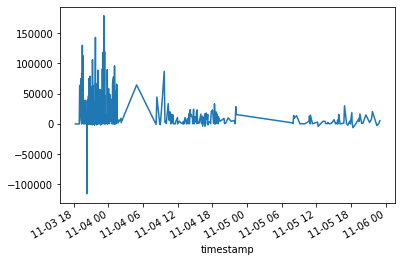

In [31]:
b.plot()

In [32]:
b = b[(b < b.max()) & (b > b.min())]
b.describe()

count       450.000000
mean      14574.891111
std       22302.327876
min       -6127.000000
25%         809.500000
50%        6223.000000
75%       17973.500000
max      143165.000000
Name: batch_size, dtype: float64

<AxesSubplot:xlabel='timestamp'>

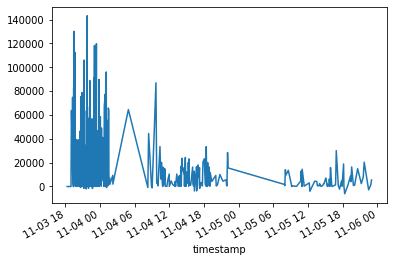

In [33]:
b.plot()

Seems clean enough...

In [34]:
s = s[s.index & b.index]
b = b[s.index]

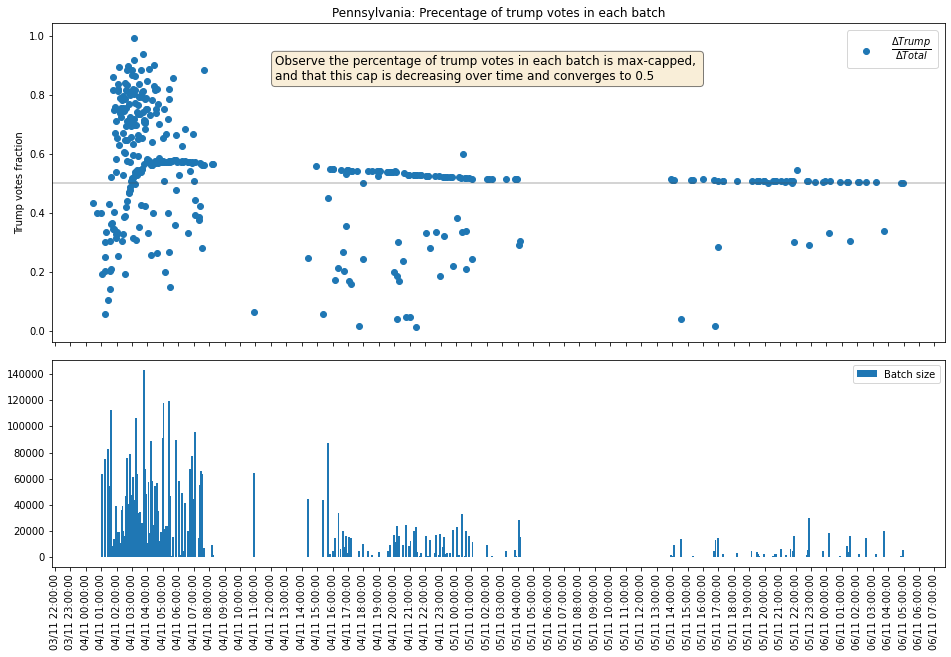

In [35]:
fig = plt.figure(figsize=(16, 10))

gs = gridspec.GridSpec(5, 1)

ax2 = fig.add_subplot(gs[3:, 0])
ax = fig.add_subplot(gs[0:3, 0], sharex=ax2)
plt.setp(ax.get_xticklabels(), visible=False)

ax.set_title('Pennsylvania: Precentage of trump votes in each batch')

ax.scatter(s.index, s, label=r"$\frac{ΔTrump}{ΔTotal}$")

textstr = """Observe the percentage of trump votes in each batch is max-capped, 
and that this cap is decreasing over time and converges to 0.5"""

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.25, 0.9, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax.set_ylabel("Trump votes fraction")
ax.axhline(y=0.5, c="#444", alpha=0.3)
ax.legend(prop={'size': 14})

ax2.set_xticklabels(s.index, rotation=90)
ax2.xaxis.set_major_locator(mdates.HourLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M:%S'))
ax2.bar(b.index, b, label="Batch size", width=0.005)
ax2.legend()